In [1]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

from prophet import Prophet
from datetime import datetime, timedelta

dayAndStepsDict = {}
week = {0:'월요일', 1:'화요일', 2:'수요일', 3:'목요일', 4:'금요일', 5:'토요일', 6:'일요일'}

f = open('simple_activity_person5.csv', 'r', encoding='utf-8')
rdr = csv.reader(f)
next(rdr) # 첫 줄 건너뛰기

# 해당 일 이후의 실제 데이터와 예측 데이터를 계산
# 이 날 까지만 fitting 데이터에 넣고, 이후 일자는 예측 값으로 계산하여 나중에 비교
# 실제데이터가 3월 26일까지 있어서, 실제데이터-예측데이터 비교를 위해 일주일만큼 뺀거
lastCheckDateStr = '2018-03-19'
lastCheckDate = datetime.strptime(lastCheckDateStr, '%Y-%m-%d')

period = 7 # forecast future 7 days

for line in rdr:
    steps = int(line[1])
    personId = line[0] # 사람 ID
    datestr = line[6][:10]
    
    dateobj = datetime.strptime(datestr, '%Y-%m-%d')
#     test: 18년 3월 20일 이후 데이터 제외(예측용으로 빼두기)
#     if dateobj > lastCheckDate:
#         continue
    # 예측 범위는 n개월로 가정
    if dateobj <= datetime(2017,12,20): # lastCheckDate - n*month 나중에 코드로 바꿔야함)
        continue
        
    if(datestr not in dayAndStepsDict):
        dayAndStepsDict[datestr] = 0
    else:
        dayAndStepsDict[datestr] += steps

# check outlier
for date, steps in dayAndStepsDict.items():
    if (steps > 10000):
        print(date + " " + str(steps))
    if (steps < 500):
        print(date + " " + str(steps))  

# # change pattern
# dateToChange = "2018-03-19"
# dayAndStepsDict[dateToChange] += 5000

dayAndStepsList = sorted(dayAndStepsDict.items(), key = lambda x:datetime.strptime(x[0], '%Y-%m-%d'))

df = pd.DataFrame(dayAndStepsList, columns =['ds', 'y'])
print(df.tail(14))
f.close()

2018-03-05 11220
2018-03-06 10015
            ds     y
82  2018-03-13  8565
83  2018-03-14  3701
84  2018-03-15  3882
85  2018-03-16  3618
86  2018-03-17  3905
87  2018-03-18  3291
88  2018-03-19  4500
89  2018-03-20  5061
90  2018-03-21  6619
91  2018-03-22  4139
92  2018-03-23  4954
93  2018-03-24  2406
94  2018-03-25  2093
95  2018-03-26  1090


In [2]:
m = Prophet()

In [3]:
m.fit(df)
future = m.make_future_dataframe(periods=period)

09:36:56 - cmdstanpy - INFO - Chain [1] start processing
09:36:56 - cmdstanpy - INFO - Chain [1] done processing


In [5]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(9)

,ds,yhat,yhat_lower,yhat_upper
94,2018-03-25,3463.138128,1522.339775,5381.028950
95,2018-03-26,5500.791472,3350.695636,7535.311761
96,2018-03-27,6004.657033,3870.732230,8138.536248
97,2018-03-28,5318.680929,3415.393448,7296.766068
98,2018-03-29,4655.204296,2658.170058,6782.118435
99,2018-03-30,3938.080239,2049.898381,6037.889646
100,2018-03-31,2835.142875,751.711216,4837.279780
101,2018-04-01,3434.975075,1372.099778,5542.594066
102,2018-04-02,5472.628419,3374.659765,7625.681493


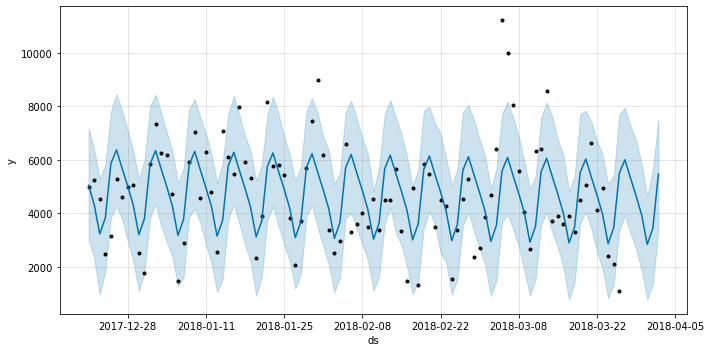

In [47]:
fig, ax = plt.subplots(figsize=(10,5))
plot = m.plot(forecast, ax=ax)


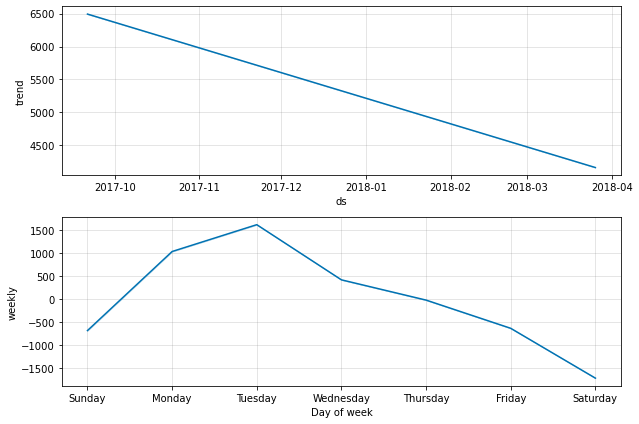

In [41]:
plot2 = m.plot_components(forecast)